In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import zarr  # to read in Zarr format
import gcsfs # to read google cloud data
import momlevel as ml
import cftime
import cmocean


In [3]:
xr.set_options(display_style='html')
%matplotlib inline                           
%config InlineBackend.figure_format='retina' 
plt.rcParams['figure.figsize'] = 12,6  

In [4]:
google_cloud_cmip6 = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')

In [5]:
O2_SSP126_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Omon' & \
    variable_id == 'o2' & \
    experiment_id == 'ssp126' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr' & \
    member_id == 'r1i1p1f1'"
)

In [6]:
O2_SSP245_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Omon' & \
    variable_id == 'o2' & \
    experiment_id == 'ssp245' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr' & \
    member_id == 'r1i1p1f1'"
)

In [7]:
O2_SSP585_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Omon' & \
    variable_id == 'o2' & \
    experiment_id == 'ssp585' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr' & \
    member_id == 'r1i1p1f1'"
)

In [8]:
O2_SSP126_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
15681,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp126,r1i1p1f1,Omon,o2,gr,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701


In [9]:
o2sat_ssp126_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Omon' & \
    variable_id == 'o2sat' & \
    experiment_id == 'ssp126' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr' & \
    member_id == 'r1i1p1f1'"
)

In [10]:
o2sat_ssp245_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Omon' & \
    variable_id == 'o2sat' & \
    experiment_id == 'ssp245' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr' & \
    member_id == 'r1i1p1f1'"
)

In [11]:
o2sat_ssp585_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Omon' & \
    variable_id == 'o2sat' & \
    experiment_id == 'ssp585' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr' & \
    member_id == 'r1i1p1f1'")

In [12]:
o2sat_ssp126_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
15679,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp126,r1i1p1f1,Omon,o2sat,gr,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701


In [13]:
gcs = gcsfs.GCSFileSystem(token='anon')
#datasets for O2
zstore_O2_SSP126_data = O2_SSP126_data.zstore.values[-1]
zstore_O2_SSP245_data = O2_SSP245_data.zstore.values[-1]
zstore_O2_SSP585_data = O2_SSP585_data.zstore.values[-1]

In [14]:
# create a mutable-mapping-style interface to the store
mapper_O2_SSP126 = gcs.get_mapper(zstore_O2_SSP126_data)
# open the dataset using xarray and zarr
O2_SSP126 = xr.open_zarr(mapper_O2_SSP126, 
                                consolidated=True,use_cftime=True).o2.rename({'lat':'latitude',
                                                             'lon':'longitude'})
mapper_O2_SSP245 = gcs.get_mapper(zstore_O2_SSP245_data)
O2_SSP245 = xr.open_zarr(mapper_O2_SSP245, 
                                consolidated=True,use_cftime=True).o2.rename({'lat':'latitude',
                                                             'lon':'longitude'})
mapper_O2_SSP585 = gcs.get_mapper(zstore_O2_SSP585_data)
O2_SSP585 = xr.open_zarr(mapper_O2_SSP585, 
                                consolidated=True,use_cftime=True).o2.rename({'lat':'latitude',
                                                             'lon':'longitude'})


In [15]:
O2_SSP126

<xarray.DataArray 'o2' (time: 1032, lev: 35, latitude: 180, longitude: 360)>
dask.array<open_dataset-o2, shape=(1032, 35, 180, 360), dtype=float32, chunksize=(13, 35, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * longitude  (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    interp_method:  conserve_order1
    long_name:      Dissolved Oxygen Concentration
    original_name:  o2
    standard_name:  mole_concentration_of_dissolved_molecular_oxygen_in_sea_w...
    units:          mol m-3

In [16]:
zstore_o2sat_ssp126 = o2sat_ssp126_data.zstore.values[-1]
zstore_o2sat_ssp245 = o2sat_ssp245_data.zstore.values[-1]
zstore_o2sat_ssp585 = o2sat_ssp585_data.zstore.values[-1]

In [17]:
mapper_o2sat_ssp126 = gcs.get_mapper(zstore_o2sat_ssp126)
O2_sat_SSP126 = xr.open_zarr(mapper_o2sat_ssp126, 
                                consolidated=True,use_cftime=True).o2sat.rename({'lat':'latitude',
                                                             'lon':'longitude'})
mapper_o2sat_ssp245 = gcs.get_mapper(zstore_o2sat_ssp245)
O2_sat_SSP245 = xr.open_zarr(mapper_o2sat_ssp245, 
                                consolidated=True,use_cftime=True).o2sat.rename({'lat':'latitude',
                                                             'lon':'longitude'})
mapper_o2sat_ssp585 = gcs.get_mapper(zstore_o2sat_ssp585)
O2_sat_SSP585 = xr.open_zarr(mapper_o2sat_ssp585, 
                                consolidated=True,use_cftime=True).o2sat.rename({'lat':'latitude',
                                                             'lon':'longitude'})

In [18]:
#difference plots for 02
diff_O2_SSP126=(O2_SSP126.sel(time=slice('2081-01-16','2100-12-16')).mean(dim='time'))-(
    O2_SSP126.sel(time=slice('2015-01-16','2025-12-16')).mean(dim='time'))

diff_O2_SSP245=(O2_SSP245.sel(time=slice('2081-01-16','2100-12-16')).mean(dim='time'))-(
    O2_SSP245.sel(time=slice('2015-01-16','2025-12-16')).mean(dim='time'))

diff_O2_SSP585=(O2_SSP585.sel(time=slice('2081-01-16','2100-12-16')).mean(dim='time'))-(
    O2_SSP585.sel(time=slice('2015-01-16','2025-12-16')).mean(dim='time'))

#difference plots for 02sat
diff_O2sat_SSP126=(O2_sat_SSP126.sel(time=slice('2081-01-16','2100-12-16')).mean(dim='time'))-(
    O2_sat_SSP126.sel(time=slice('2015-01-16','2025-12-16')).mean(dim='time'))

diff_O2sat_SSP245=(O2_sat_SSP245.sel(time=slice('2081-01-16','2100-12-16')).mean(dim='time'))-(
    O2_sat_SSP245.sel(time=slice('2015-01-16','2025-12-16')).mean(dim='time'))

diff_O2sat_SSP585=(O2_sat_SSP585.sel(time=slice('2081-01-16','2100-12-16')).mean(dim='time'))-(
    O2_sat_SSP585.sel(time=slice('2015-01-16','2025-12-16')).mean(dim='time'))

In [19]:
O2_sat_SSP126

<xarray.DataArray 'o2sat' (time: 1032, lev: 35, latitude: 180, longitude: 360)>
dask.array<open_dataset-o2sat, shape=(1032, 35, 180, 360), dtype=float32, chunksize=(15, 35, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * longitude  (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    interp_method:  conserve_order1
    long_name:      Dissolved Oxygen Concentration at Saturation
    original_name:  o2sat
    standard_name:  mole_concentration_of_dissolved_molecular_oxygen_in_sea_w...
    units:          mol m-3

Text(0.5, 1.0, 'Difference in Dissolved Oxygen Content for SSP126 at SS')

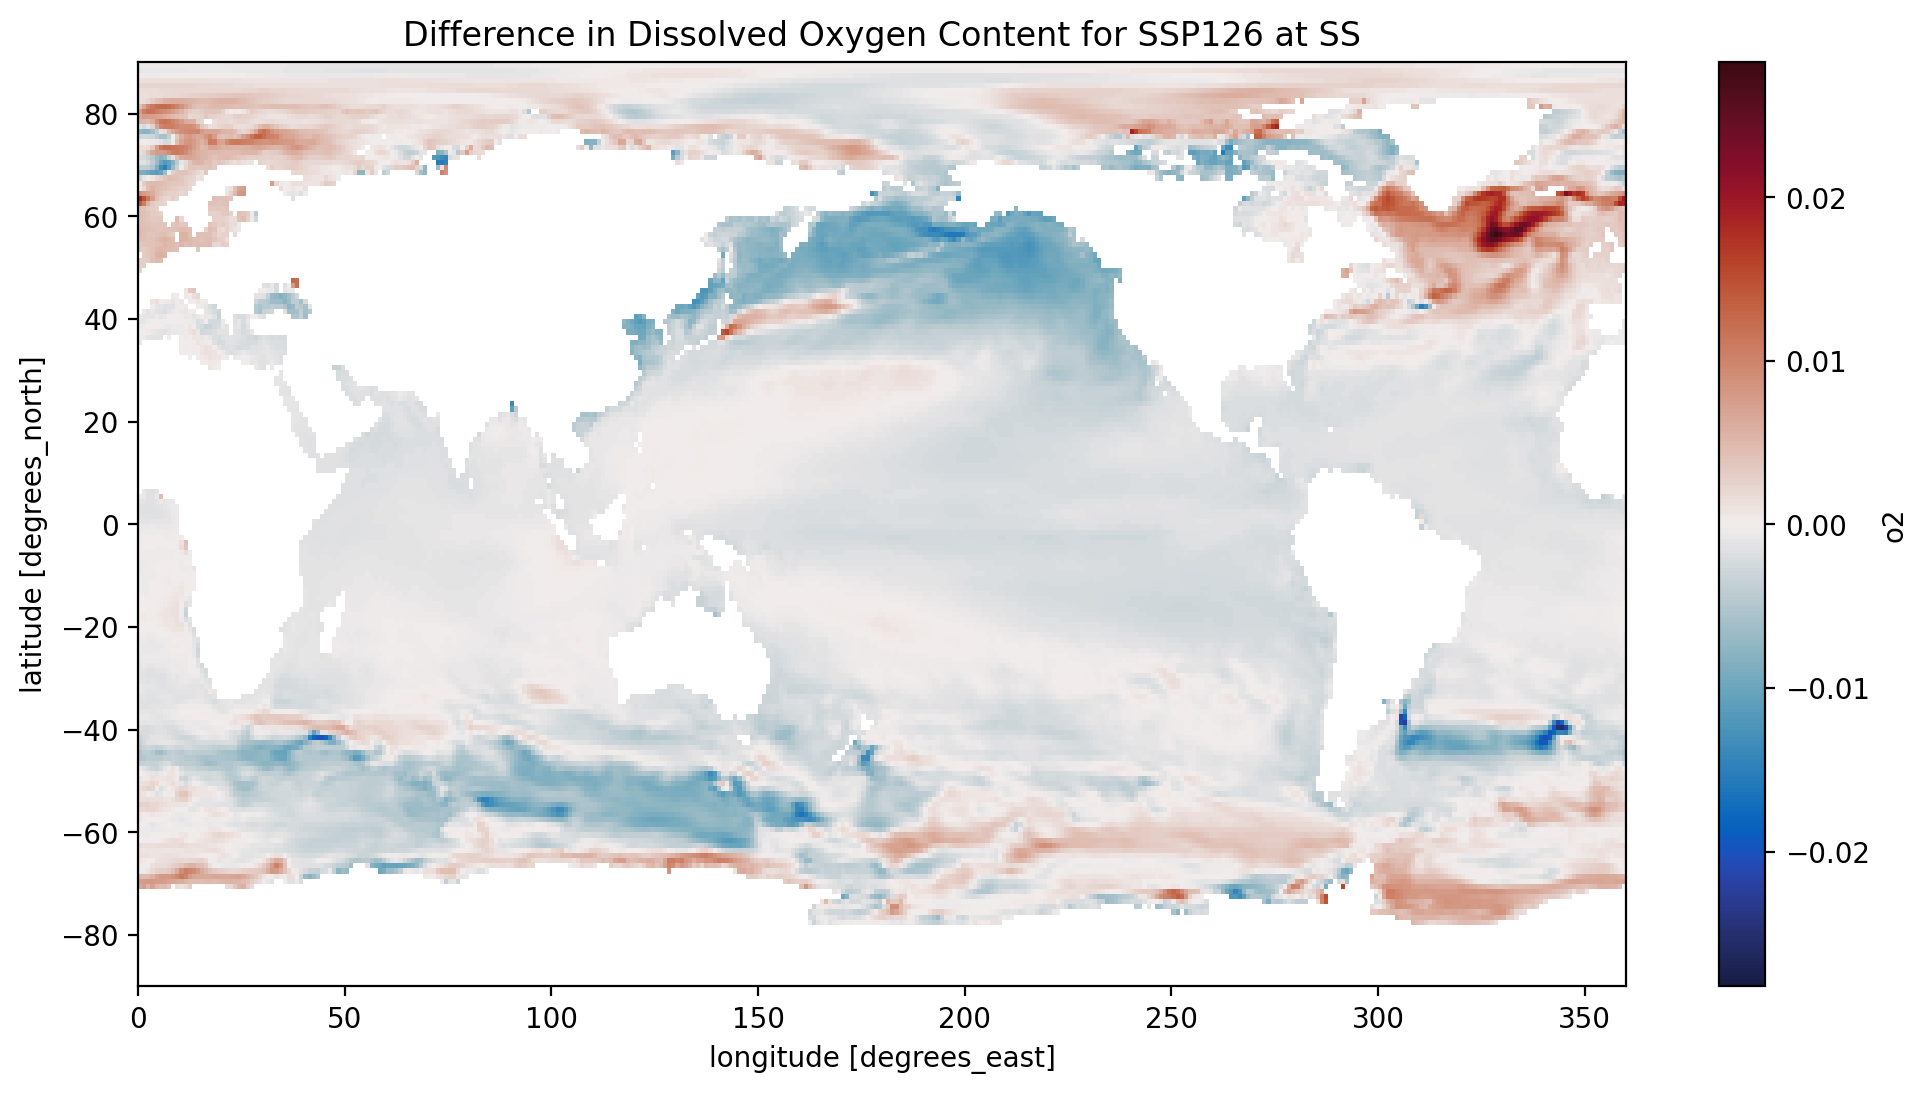

In [29]:
diff_126_O2_Surface = diff_O2_SSP126.isel(lev=0).plot(cmap=cmocean.cm.balance)
plt.title('Difference in Dissolved Oxygen Content for SSP126 at SS')

Text(0.5, 1.0, 'Difference in Dissolved Oxygen Content for SSP245 at SS')

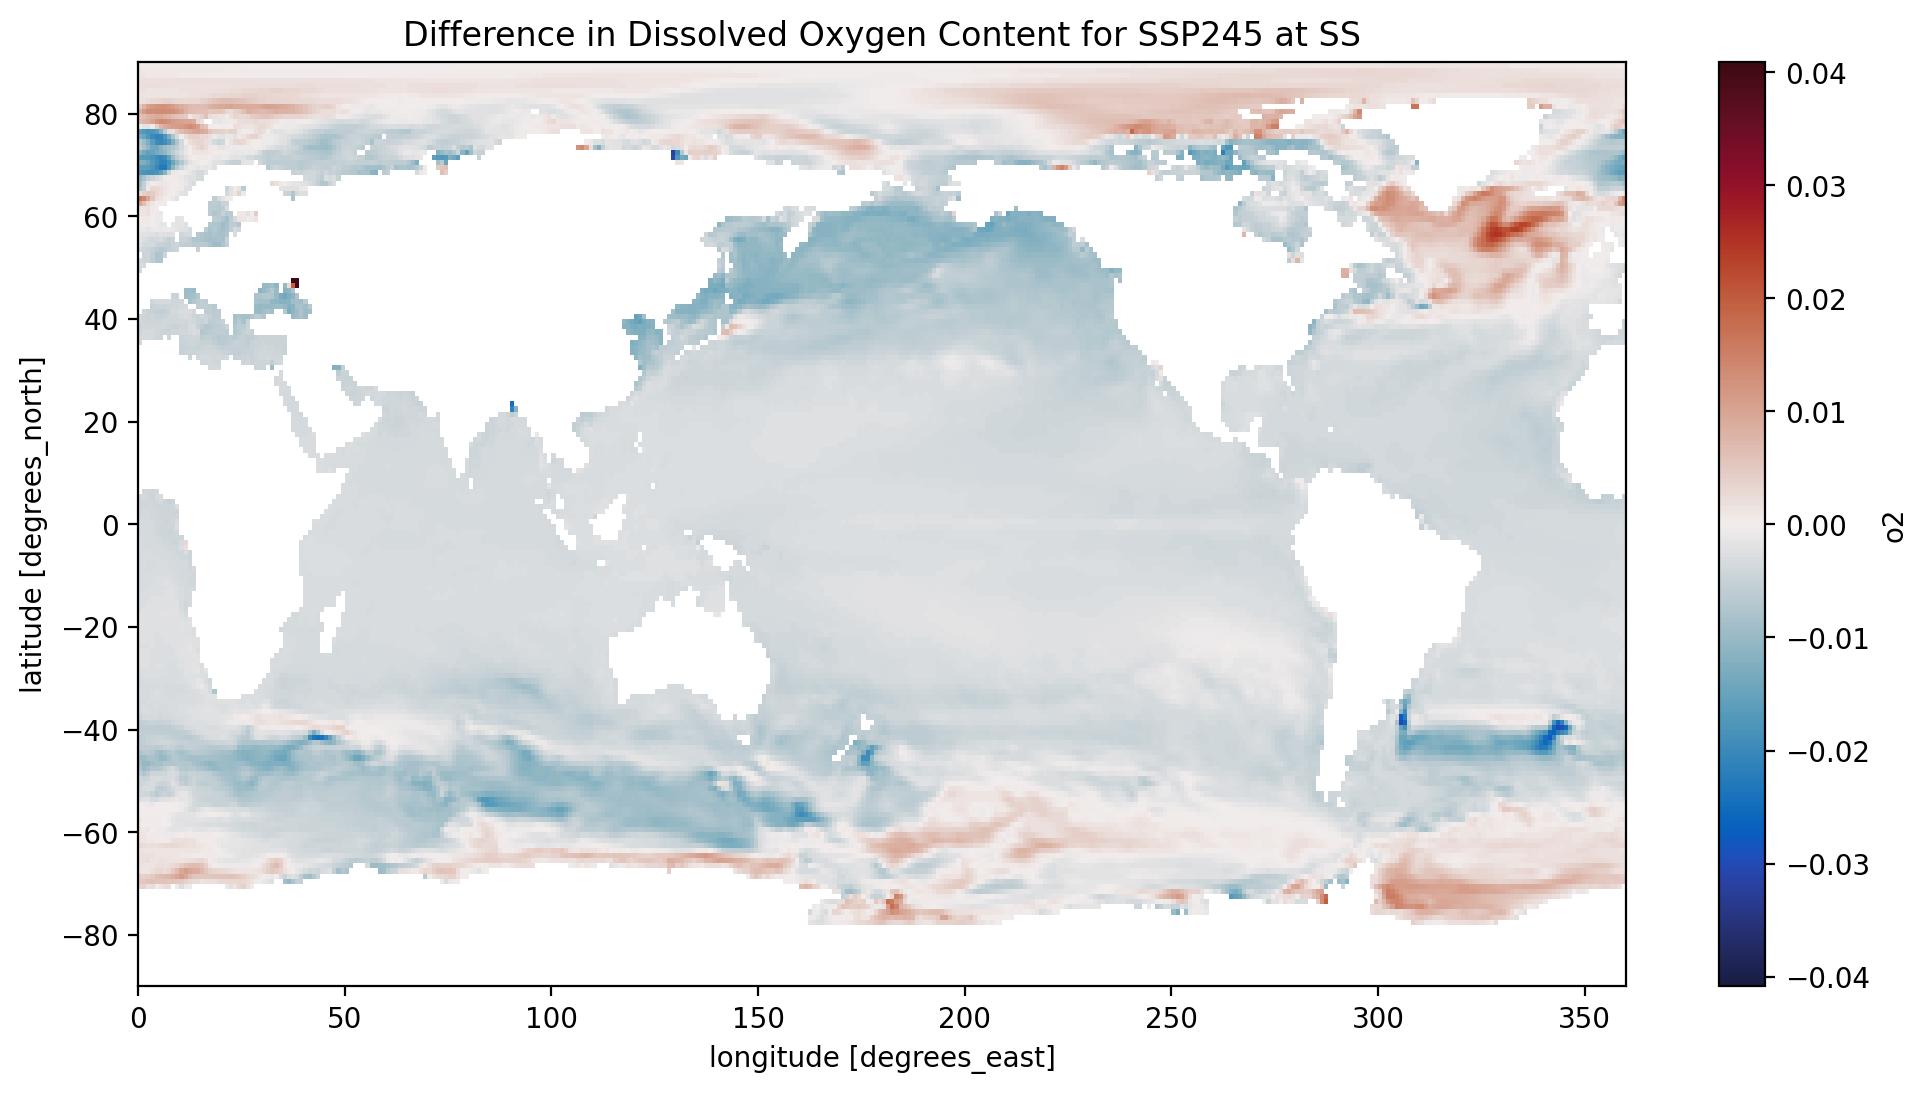

In [20]:
diff_245_O2_Surface = diff_O2_SSP245.isel(lev=0).plot(cmap=cmocean.cm.balance)
plt.title('Difference in Dissolved Oxygen Content for SSP245 at SS')

Text(0.5, 1.0, 'Difference in Dissolved Oxygen Content for SSP585 at SS')

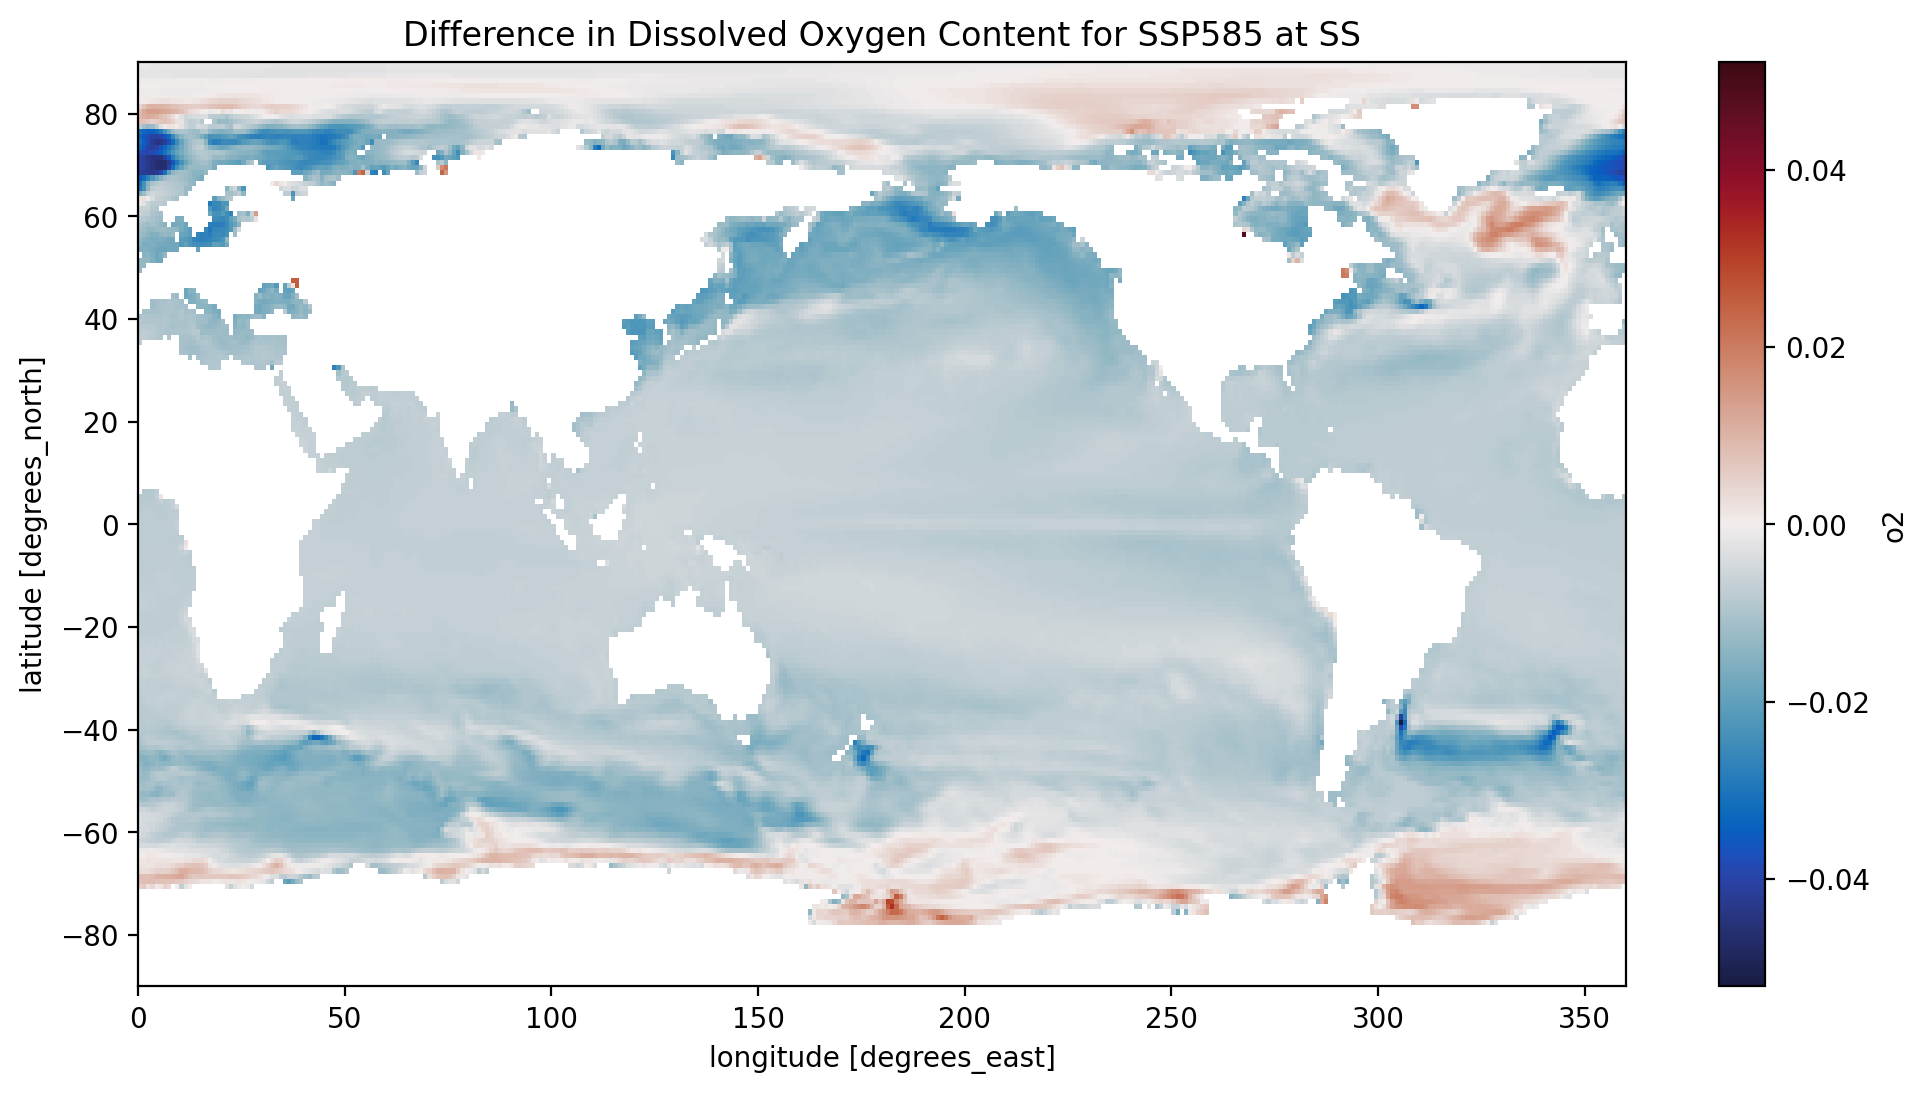

In [21]:
diff_585_O2_Surface = diff_O2_SSP585.isel(lev=0).plot(cmap=cmocean.cm.balance)
plt.title('Difference in Dissolved Oxygen Content for SSP585 at SS')

Text(0.5, 1.0, 'Zonal Average of Dissolved Oxygen Content for SSP126')

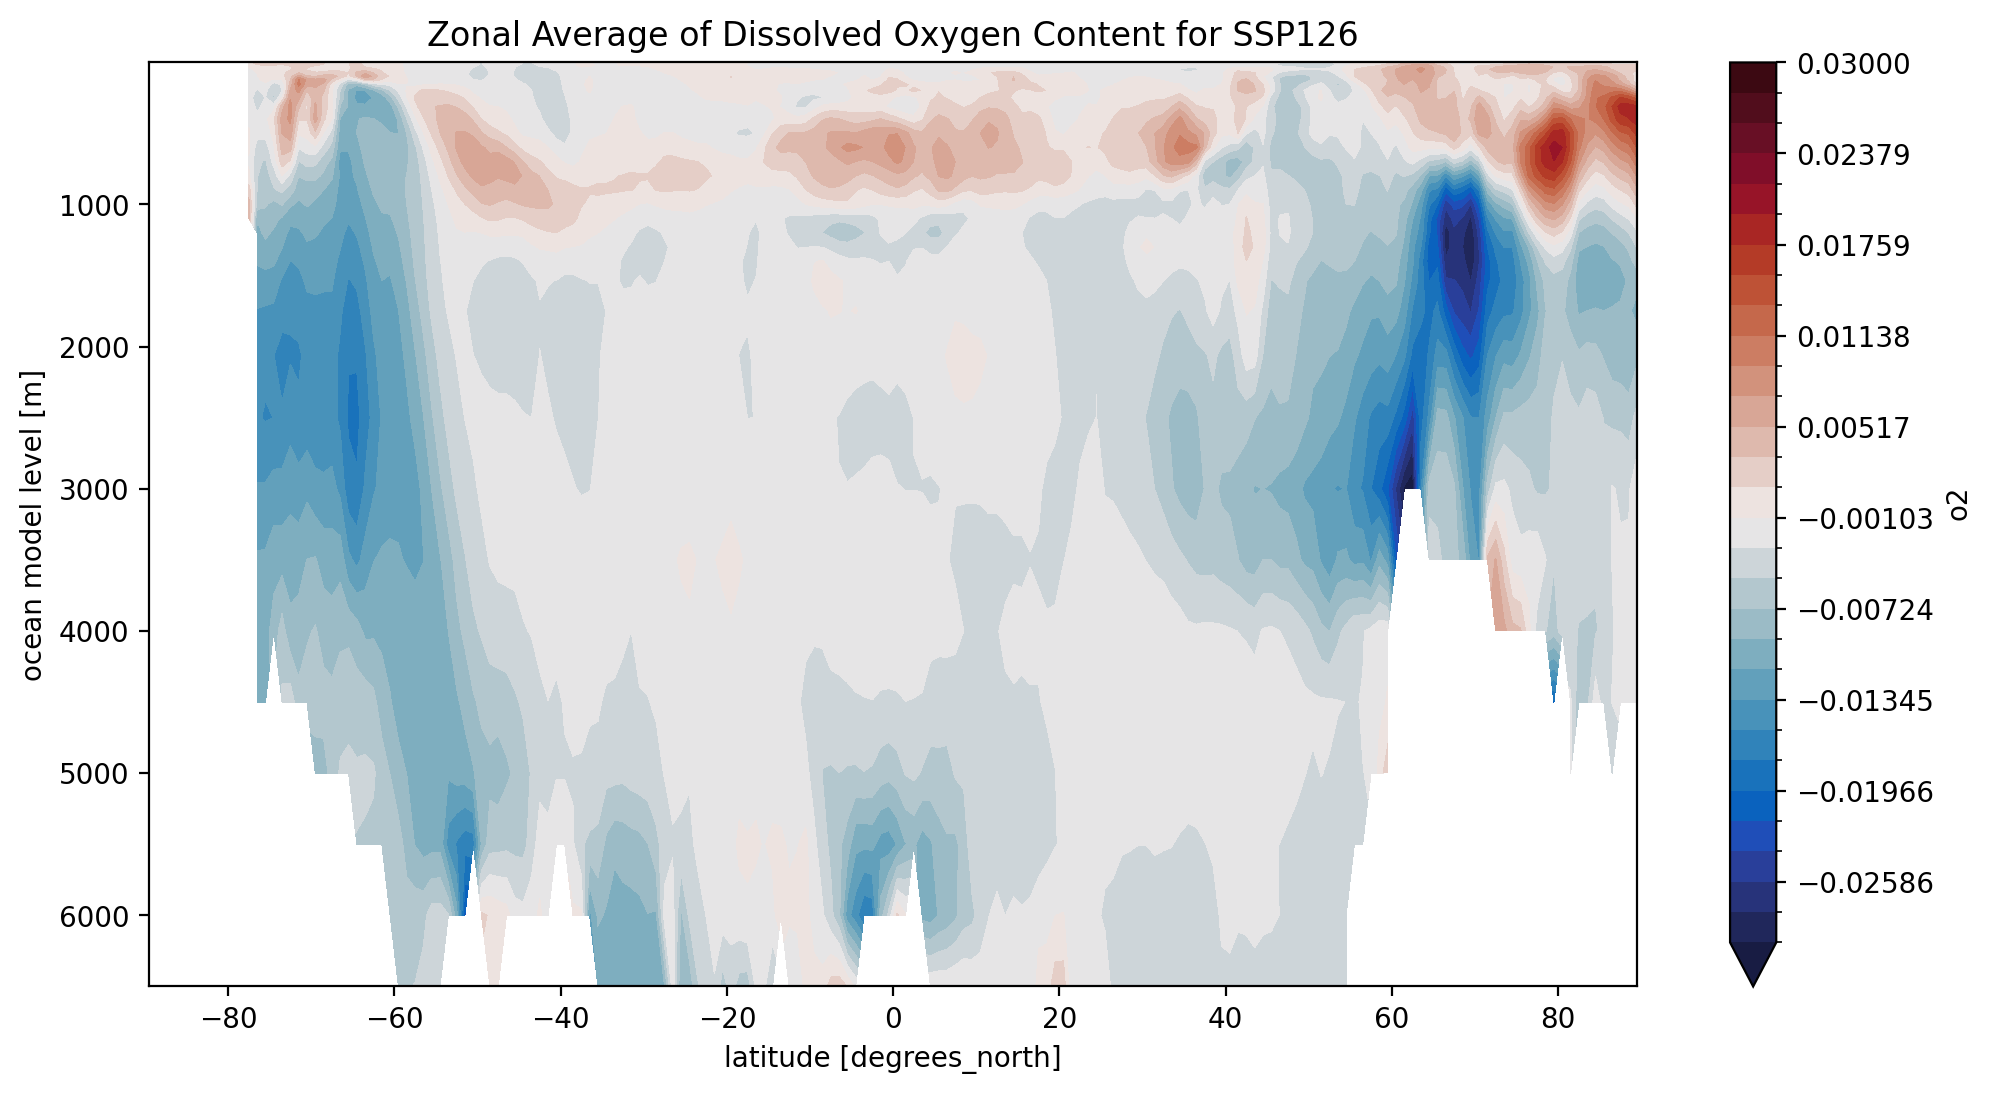

In [30]:
zd_126_02= diff_O2_SSP126.mean(dim='longitude').plot.contourf(
    cmap=cmocean.cm.balance, yincrease=False, vmin=-0.03,vmax=0.03, levels=30)
plt.title('Zonal Average of Dissolved Oxygen Content for SSP126')

In [ ]:
zd_245_02= diff_O2_SSP245.mean(dim='longitude').plot.contourf(
    cmap=cmocean.cm.balance, yincrease=False, vmin=-0.03,vmax=0.03,levels=30)
plt.title('Zonal Average of Dissolved Oxygen Content for SSP245')

In [ ]:
zd_585_02= diff_O2_SSP585.mean(dim='longitude').plot.contourf(
    cmap=cmocean.cm.balance, yincrease=False, vmin=-0.03,vmax=0.03,levels=30)
plt.title('Zonal Average of Dissolved Oxygen Content for SSP585')

In [ ]:
diff_126_O2S_Surface = diff_O2sat_SSP126.isel(lev=0).plot(cmap=cmocean.cm.balance)
plt.title('Difference in Dissolved Oxygen Content at Saturation for SSP126 at SS')

In [ ]:
diff_245_O2S_Surface = diff_O2sat_SSP245.isel(lev=0).plot(cmap=cmocean.cm.balance)
plt.title('Difference in Dissolved Oxygen Content at Saturation for SSP245 at SS')

In [ ]:
diff_585_O2S_Surface = diff_O2sat_SSP585.isel(lev=0).plot(cmap=cmocean.cm.balance)
plt.title('Difference in Dissolved Oxygen Content at Saturation for SSP585 at SS')

In [ ]:
zd_126_02S= diff_O2sat_SSP126.mean(dim='longitude').plot.contourf(
    cmap=cmocean.cm.balance, yincrease=False,  vmin=-0.007,vmax=0.007, levels=30)
plt.title('Zonal Average of Dissolved Oxygen Content at Saturation for SSP126')

In [ ]:
zd_245_02S= diff_O2sat_SSP245.mean(dim='longitude').plot.contourf(
    cmap=cmocean.cm.balance, yincrease=False,  vmin=-0.009,vmax=0.009,levels=30)
plt.title('Zonal Average of Dissolved Oxygen Content at Saturation for SSP245')

In [ ]:
zd_585_02S= diff_O2sat_SSP585.mean(dim='lon').plot.contourf(
    cmap=cmocean.cm.balance, yincrease=False,  vmin=-0.015,vmax=0.015,  levels=30)
plt.title('Zonal Average of Dissolved Oxygen Content at Saturation for SSP585')

In [37]:
AOU_SSP585=O2_SSP585-O2_sat_SSP585
AOU_d585=(AOU_SSP585.sel(time=slice('2081-01-16','2100-12-16')).mean(dim='time'))-(
    AOU_SSP585.sel(time=slice('2015-01-16','2025-12-16')).mean(dim='time'))

In [38]:
AOU_SSP585

<xarray.DataArray (time: 1032, lev: 35, latitude: 180, longitude: 360)>
dask.array<sub, shape=(1032, 35, 180, 360), dtype=float32, chunksize=(13, 35, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * longitude  (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00

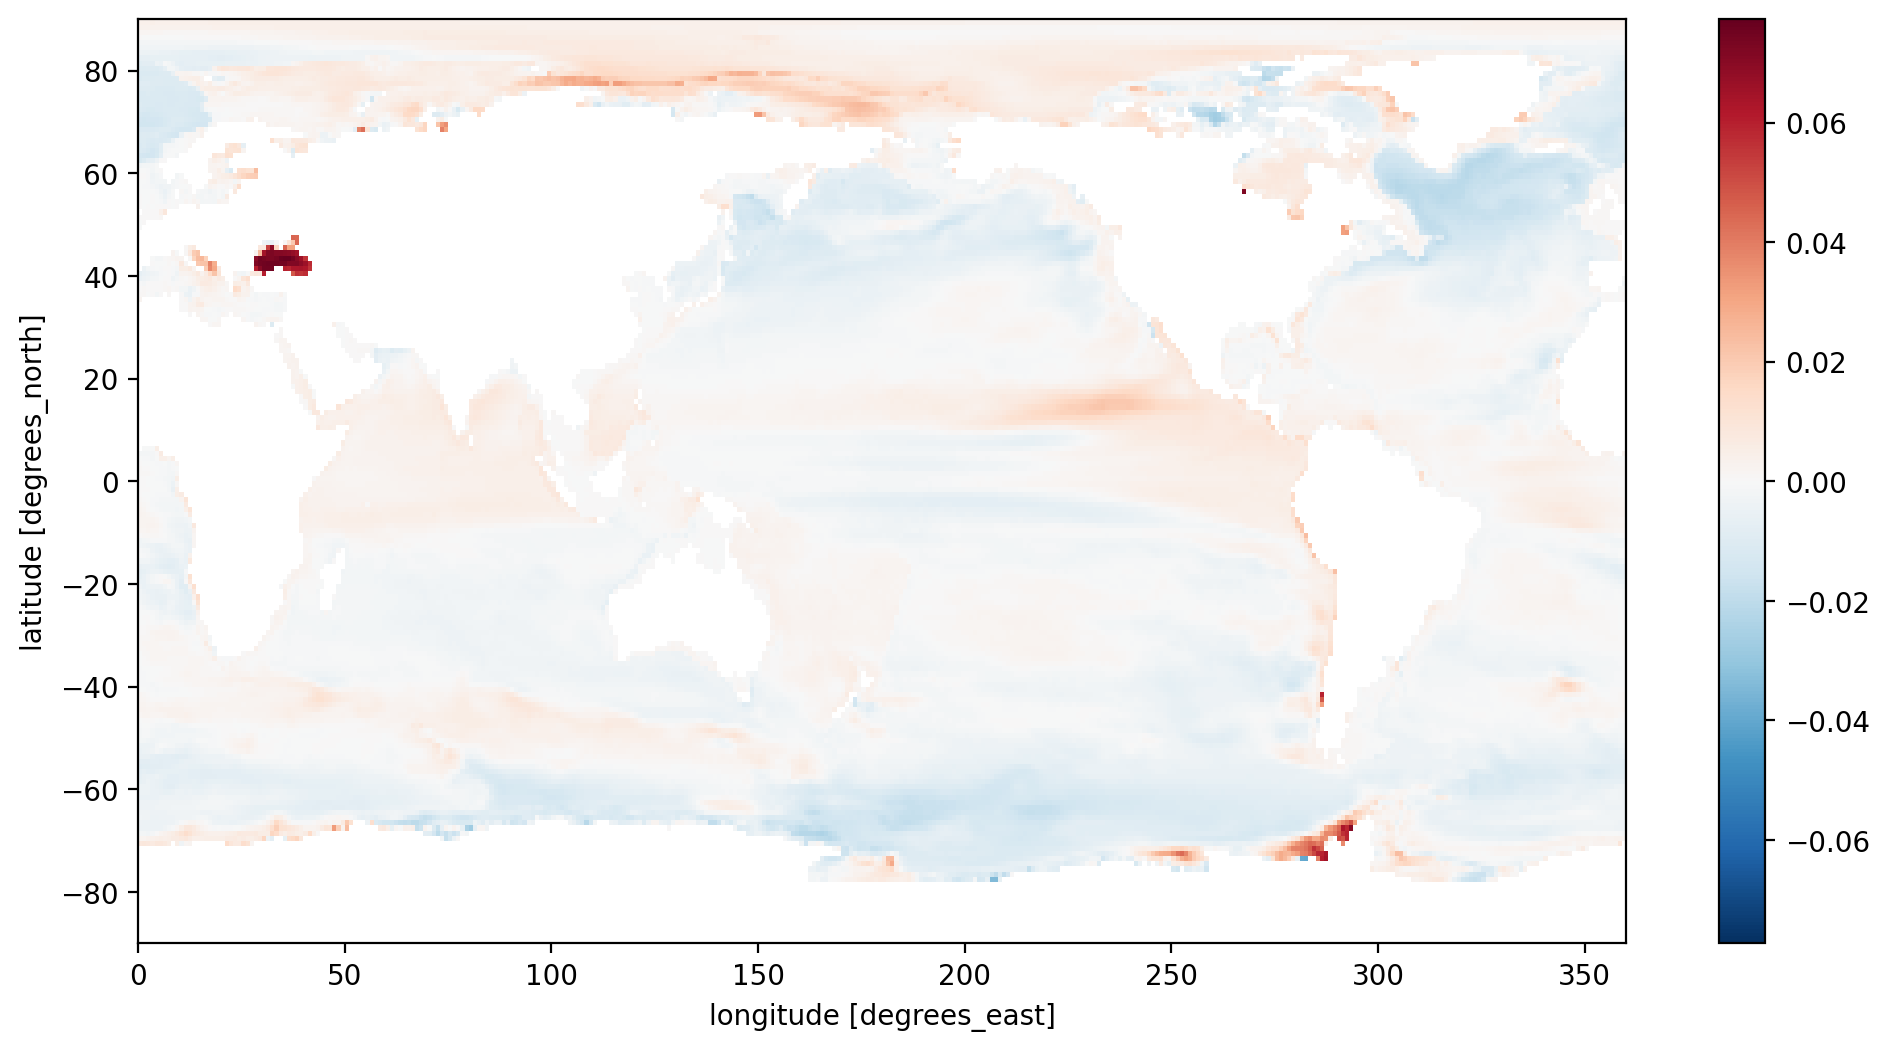

In [41]:
AOU_d585.mean(dim='lev').plot()

In [23]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy
import cartopy.crs as ccrs
import cmocean 

In [24]:
esm4_basins = xr.open_dataset('../data/basins/esm4_basins_gr.nc').basins

In [25]:
esm4_basins#.plot()

<xarray.DataArray 'basins' (latitude: 180, longitude: 360)>
[64800 values with dtype=float64]
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
    lev        float64 ...
    time       object ...
  * longitude  (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
    lon        (longitude) float64 ...

Text(0.5, 1.0, 'Ocean Basin Mask')

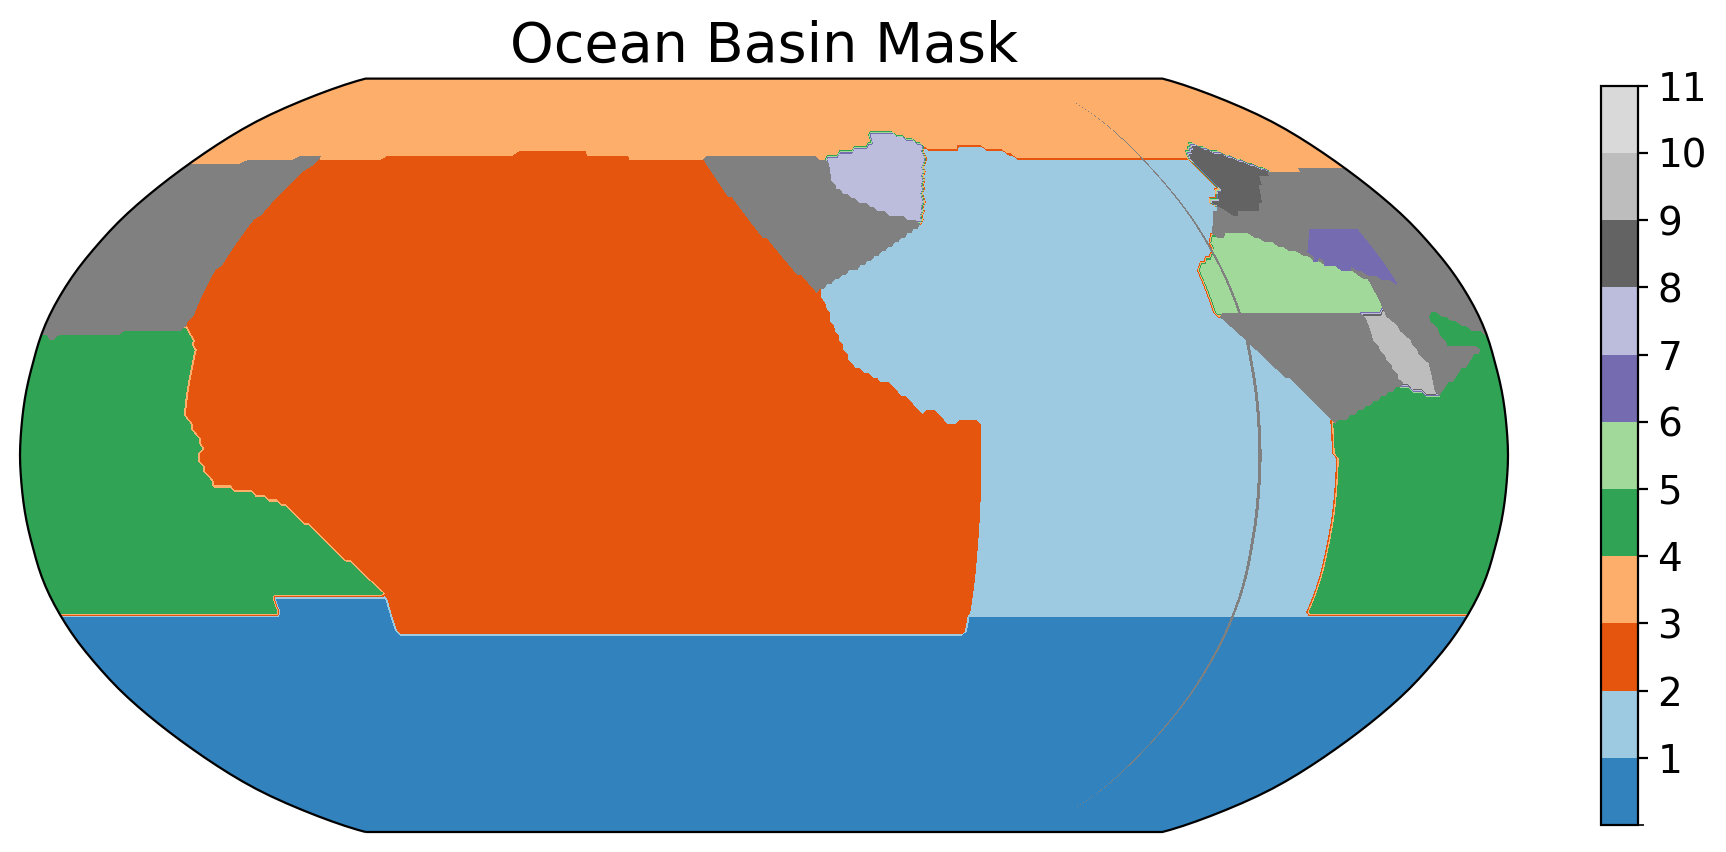

In [26]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p =esm4_basins.plot.contourf(x='longitude',y='latitude',
                         cmap='tab20c',
                         vmin=0,vmax=11,levels=12,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[1,2,3,4,5,6,7,8,9,10,11], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Ocean Basin Mask",fontsize=20)

In [27]:
southernocean = (esm4_basins.where(esm4_basins==1) /  esm4_basins.where(esm4_basins==1)) ### Values 1 over atlantic, NaN elsewhere
atlanticocean = (esm4_basins.where(esm4_basins==2) / esm4_basins.where(esm4_basins==2)) ### Values 1 over atlantic, NaN elsewhere
pacificocean =  (esm4_basins.where(esm4_basins==3) / esm4_basins.where(esm4_basins==3))
articocean = (esm4_basins.where(esm4_basins==4) / esm4_basins.where(esm4_basins==4))
indianocean = (esm4_basins.where(esm4_basins==5) / esm4_basins.where(esm4_basins==5))
### and so on for the other basins ..... work through the code above step by step
### to make sure you understand it.

In [28]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = map.plot.contourf(x='longitude',y='latitude',
                      vmin=-0.08, vmax=0.08, 
                      cmap=cmocean.cm.balance,
                      subplot_kws = subplot_kws,
                      transform=ccrs.PlateCarree())

AttributeError: type object 'map' has no attribute 'plot'

<Figure size 1200x800 with 0 Axes>

In [34]:
O2_avg=(O2_SSP585*southernocean).sel(latitude=slice(-90,0)).mean(dim=['latitude','longitude']) #use an area average, maybe later use an area weighted average in the future 

O2_antarctic_avg=O2_avg.sel(time=slice('2015-01-16','2100-12-16')).groupby('time.month').mean(dim='time').mean(dim='lev')

In [36]:
O2_585_southern = (O2_SSP585*southernocean).sel(latitude=slice(-90,0)).mean(dim=['latitude','longitude']).sel(time=slice('2015-01-16','2100-12-16')).groupby(
    'time.month').mean(dim='time')

O2_585_atlantic = (O2_SSP585*atlanticocean).mean(dim=['latitude','longitude']).sel(time=slice('2015-01-16','2100-12-16')).groupby(
    'time.month').mean(dim='time')

O2_585_pacific = (O2_SSP585*pacificocean).mean(dim=['latitude','longitude']).sel(time=slice('2015-01-16','2100-12-16')).groupby(
    'time.month').mean(dim='time')

O2_585_arctic = (O2_SSP585*articocean).mean(dim=['latitude','longitude']).sel(time=slice('2015-01-16','2100-12-16')).groupby(
    'time.month').mean(dim='time')

O2_585_indian = (O2_SSP585*indianocean).mean(dim=['latitude','longitude'])#.sel(time=slice('2015-01-16','2100-12-16')).groupby(
    #'time.month').mean(dim='time').isel(lev=0)



In [32]:
O2_585_2015_in=(O2_585_indian.sel(time=slice('2015-01-16','2015-12-16'))).groupby('time.month').mean(dim='time').mean(dim='lev')

O2_585_2100_in=O2_585_indian.sel(time=slice('2100-01-16','2100-12-16')).groupby(
    'time.month').mean(dim='time').isel(lev=0)

STD=O2_585_indian.sel(time=slice('2015-01-16','2100-12-16')).groupby(
    'time.month').std(dim='time').isel(lev=0)

Std_in = (O2_SSP585*indianocean)+STD
Std_in2 = (O2_SSP585*indianocean)-STD

/home/ees_student/miniconda3/envs/ees3506_5506_1/lib/python3.9/site-packages/dask/array/core.py:4832: PerformanceWarning: Increasing number of chunks by factor of 12
  result = blockwise(
/home/ees_student/miniconda3/envs/ees3506_5506_1/lib/python3.9/site-packages/dask/array/core.py:4832: PerformanceWarning: Increasing number of chunks by factor of 12
  result = blockwise(


In [66]:
O2_585_2015=(O2_SSP585*articocean).mean(dim=['latitude','longitude']).sel(time=slice('2015-01-16','2015-12-16')).groupby(
    'time.month').mean(dim='time').isel(lev=0)

O2_585_2100=(O2_SSP585*articocean).mean(dim=['latitude','longitude']).sel(time=slice('2100-01-16','2100-12-16')).groupby(
    'time.month').mean(dim='time').isel(lev=0)

STD=(O2_SSP585*articocean).mean(dim=['latitude','longitude']).sel(time=slice('2015-01-16','2100-12-16')).groupby(
    'time.month').std(dim='time').isel(lev=0)

STD_top = O2_585_arctic+STD
STD_bot = O2_585_arctic-STD
months= np.arange(12)

/home/ees_student/miniconda3/envs/ees3506_5506_1/lib/python3.9/site-packages/dask/array/numpy_compat.py:43: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


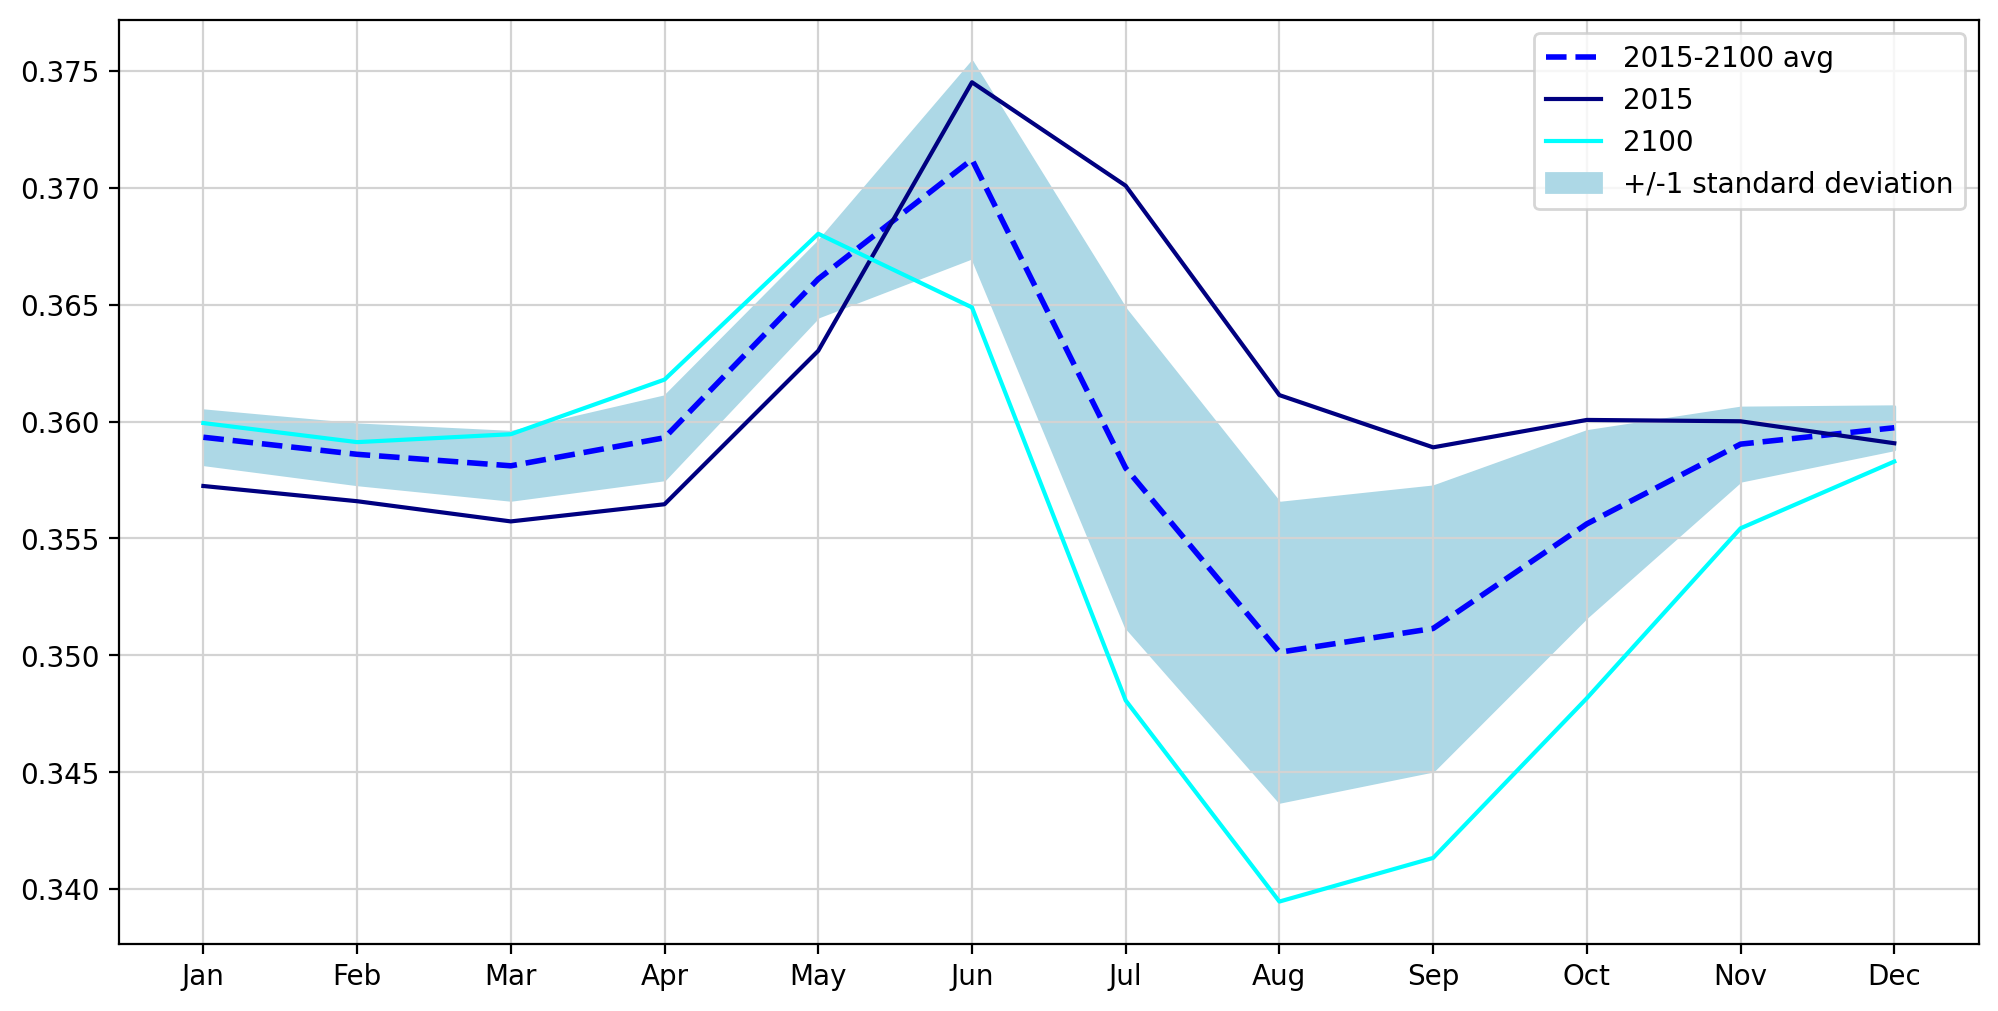

In [37]:
fig,ax = plt.subplots(figsize=(12,6)) #arctic ocean
ax.plot(O2_585_arctic,
        linewidth=2,
        linestyle='--',
        label='2015-2100 avg',
        color='blue')

ax.plot(O2_585_2015,
       label='2015',
       color='navy')

ax.plot(O2_585_2100,
       label='2100',
       color='cyan')

ax.plot(STD_top,
       alpha=0)
ax.plot(STD_bot,
       alpha=0)

ax.fill_between(months,STD_top, STD_bot,
                color='lightblue',
                label='+/-1 standard deviation')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],
           ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ax.grid(color='lightgrey')
ax.legend()

In [78]:
O2_SSP585_avg = O2_SSP585.mean(dim=['latitude','longitude', 'lev'])
O2_2015 = O2_SSP585_avg.sel(time=slice('2015-01-16','2015-12-16')).groupby('time.month').mean(dim='time')
O2_2100 = O2_SSP585_avg.sel(time=slice('2100-01-16','2100-12-16')).groupby('time.month').mean(dim='time')
O2_global_avg =O2_SSP585_avg.sel(time=slice('2015-01-16','2100-12-16')).groupby('time.month').mean(dim='time')

O2_std_T=O2_global_avg + (O2_SSP585_avg.sel(time=slice('2015-01-16','2100-12-16')).groupby('time.month').std(dim='time'))
O2_std_B = O2_global_avg - (O2_SSP585_avg.sel(time=slice('2015-01-16','2100-12-16')).groupby('time.month').std(dim='time'))

O2_std_T2 = O2_std_T*2
O2_std_B2 = O2_std_B*2 
months= np.arange(12)

In [79]:
O2_2015

<xarray.DataArray 'o2' (month: 12)>
dask.array<stack, shape=(12,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [67]:
O2_585_2015

<xarray.DataArray (month: 12)>
dask.array<getitem, shape=(12,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    lev      float64 2.5
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

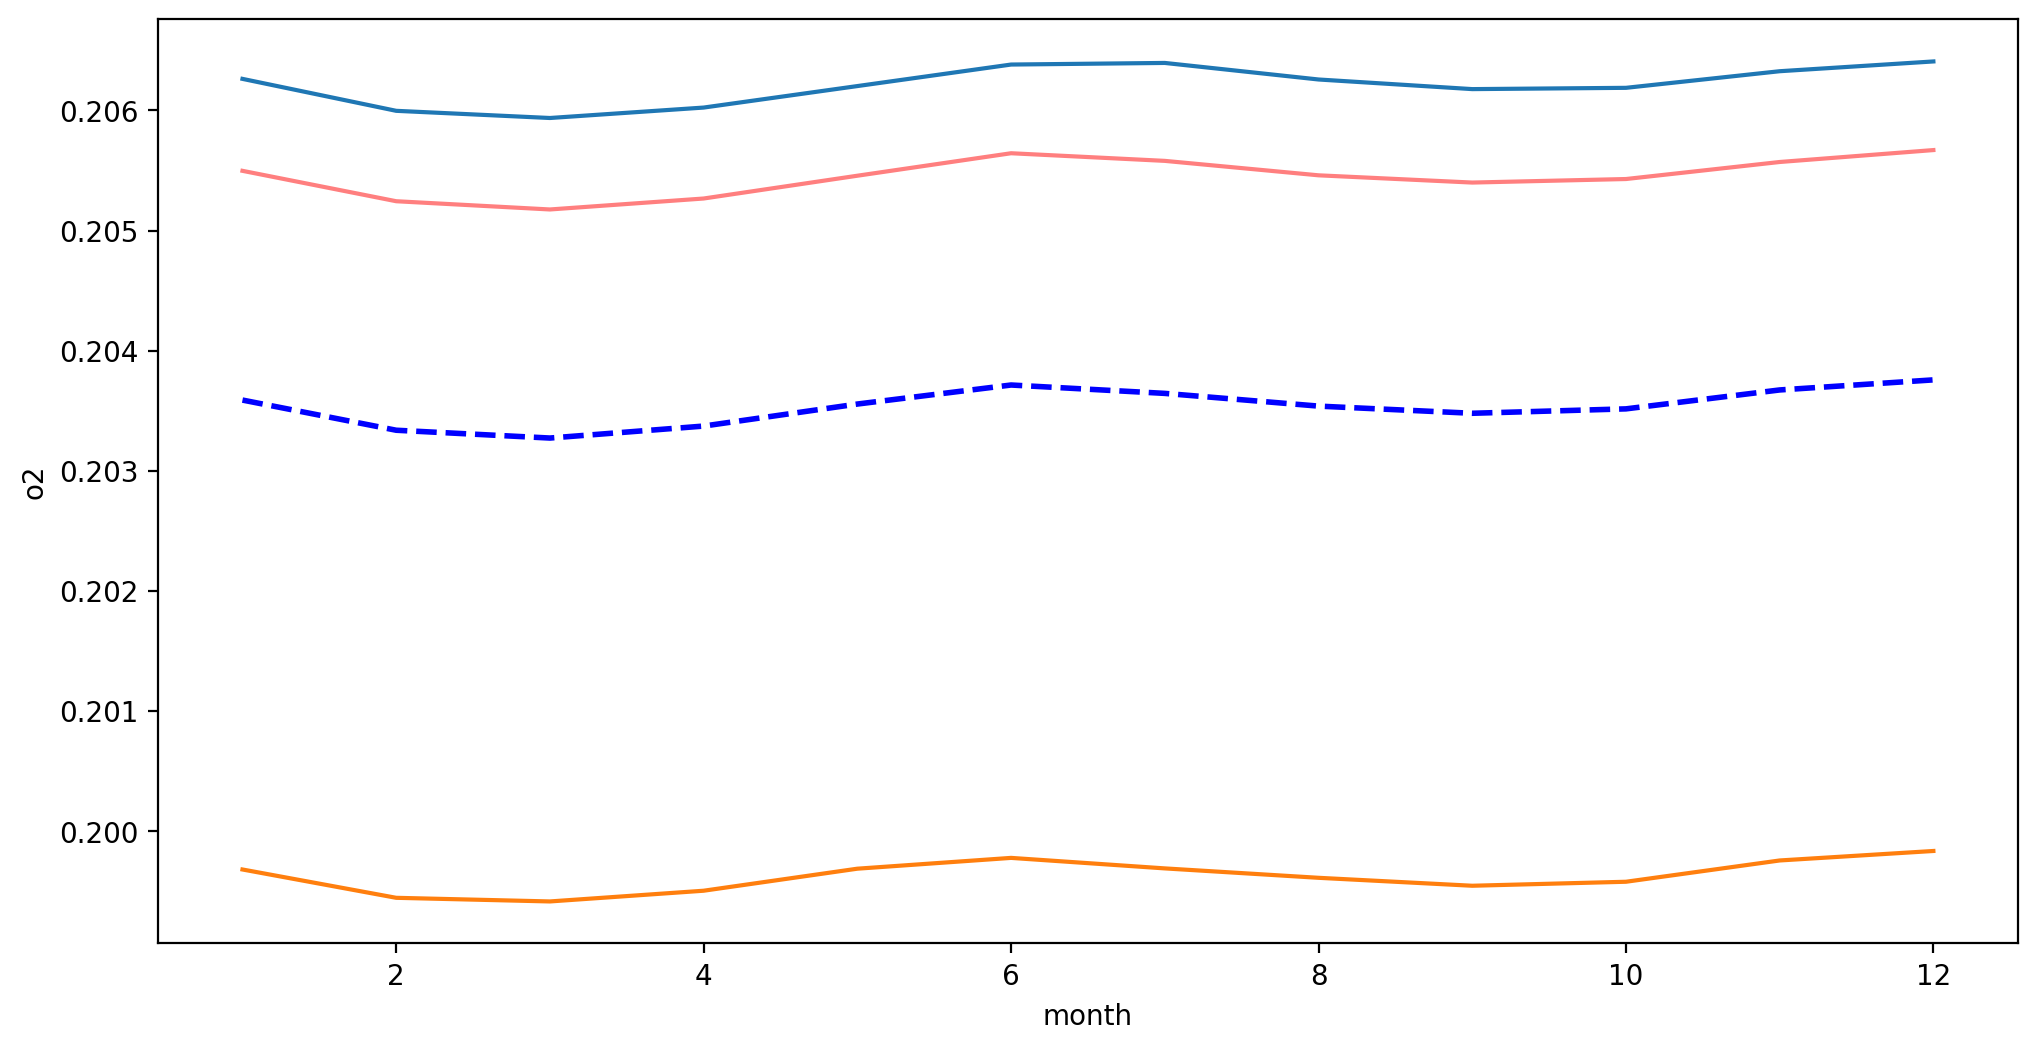

In [82]:
O2_global_avg.plot(linewidth=2,
        linestyle='--',
        label='2015-2100 avg',
        color='blue')
O2_2015.plot()
O2_2100.plot()
O2_std_T.plot(alpha=0.5, color='red')
O2_std_B.plot(alpha=0, color='red')

ax.fill_between(months,O2_std_T,O2_std_B,
                color='lightblue',
                label='+/-1 standard deviation')

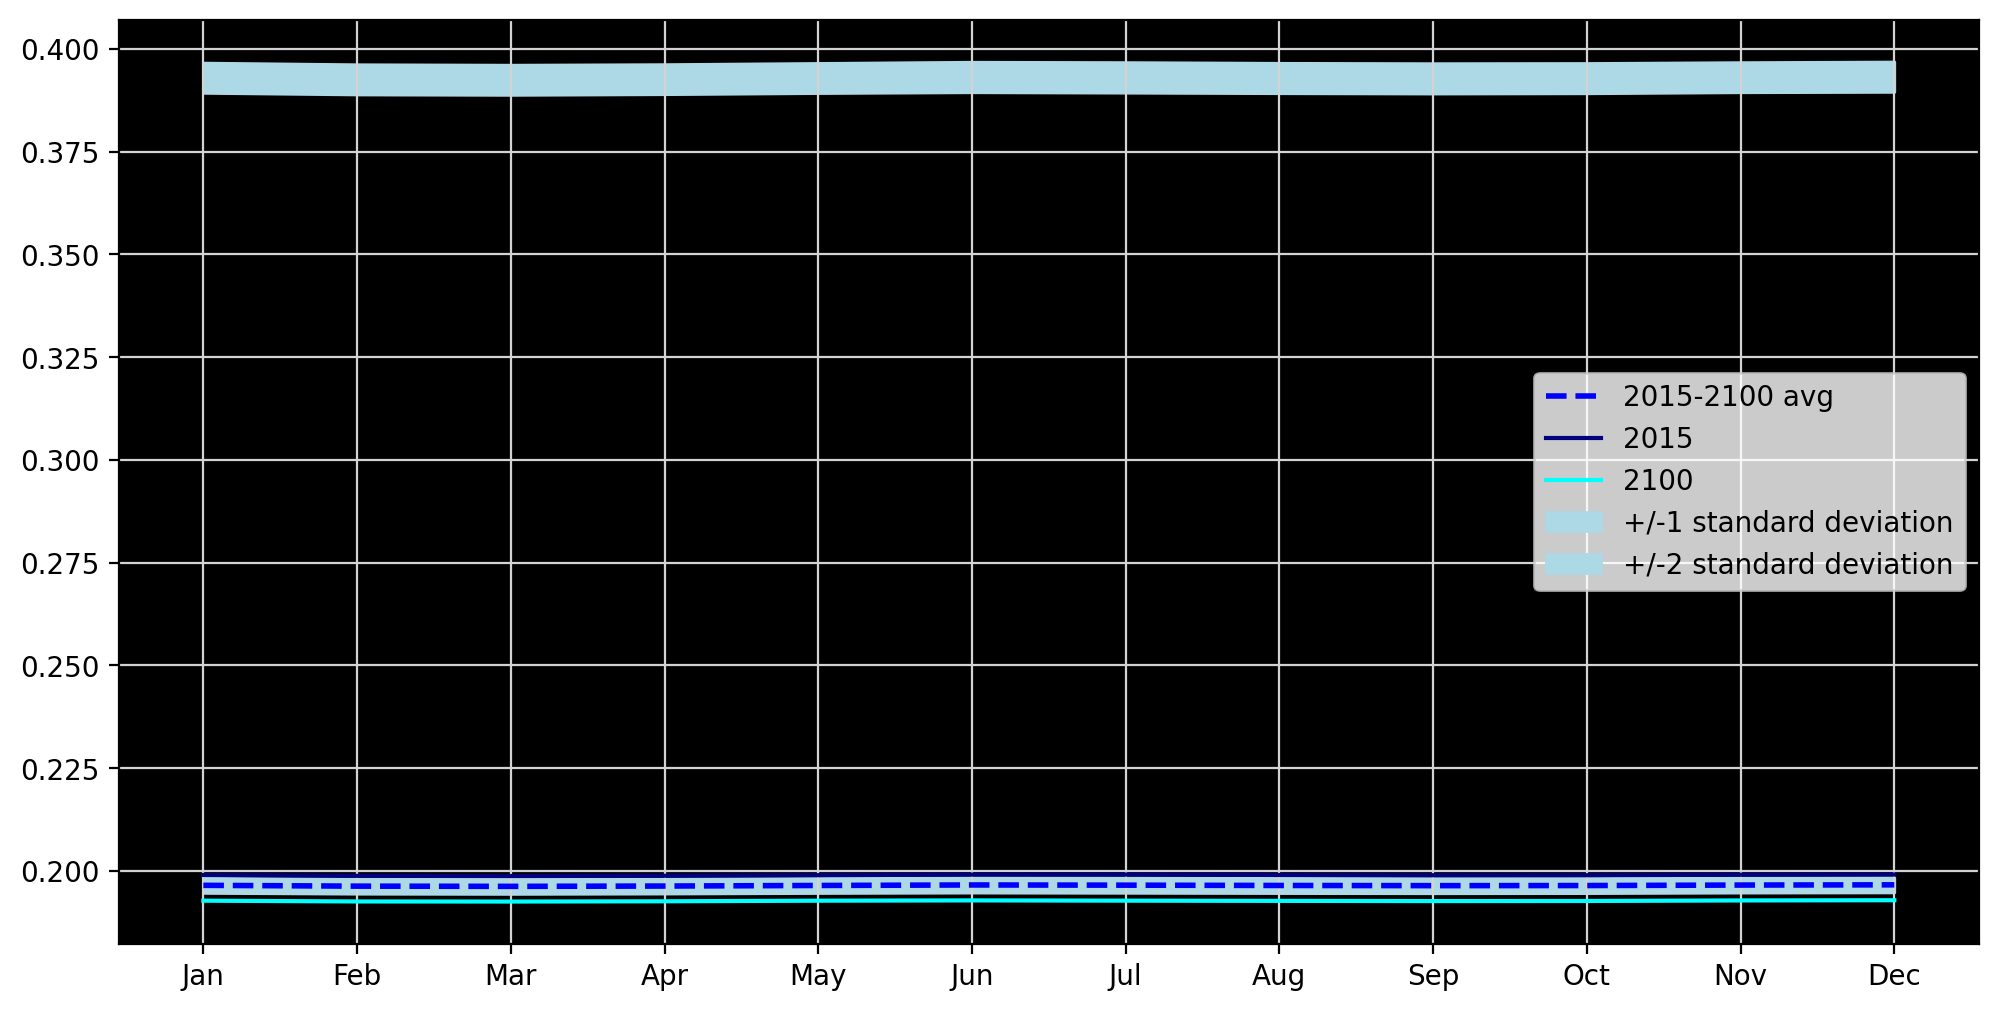

In [68]:
fig,ax = plt.subplots(figsize=(12,6)) #arctic ocean
ax.plot(O2_global_avg,
        linewidth=2,
        linestyle='--',
        label='2015-2100 avg',
        color='blue')

ax.plot(O2_2015,
       label='2015',
       color='navy')

ax.plot(O2_2100,
       label='2100',
       color='cyan')

ax.plot(O2_std_T,alpha=0)
ax.plot(O2_std_B,alpha=0)
ax.plot(O2_std_T2,alpha=0)
ax.plot(O2_std_B2,alpha=0)

ax.fill_between(months,O2_std_T,O2_std_B,
                color='lightblue',
                label='+/-1 standard deviation')

ax.fill_between(months,O2_std_T2, O2_std_B2,
                color='lightblue',
                label='+/-2 standard deviation')


plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11], ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ax.grid(color='lightgrey')

ax.set_facecolor('black')
ax.legend()

In [ ]:
fig,ax = plt.subplots(figsize=(12,6))
ax.plot(O2_585_southern, 
       label = 'Southern Ocean', 
       color = 'red' )
ax.plot(O2_585_atlantic)
ax.plot(O2_585_pacific)
ax.plot(O2_585_arctic)
ax.plot(O2_585_indian)

ax.legend()

In [ ]:
O2_SSP585